In [2]:
import sys
sys.path.append(r"C:\Users\hrida\ReinforcementLearning")
from Environments import initialize_windyGridworld as gridWorld

In [3]:
import numpy as np
import pandas as pd
import random

In [4]:
"""
Making a Randomwalk Environment with 2n+1 states.

0l . . . 0 0 0 0 0 0 0 0 S 0 0 0 0 0 0 0 0 . . . 0r

0l and 0r denote the terminal states.

Action Space :

-1 (Left)
+1 (Right)

Rewards Setting :

-1 : Agent goes to 0l
+1 : Agent goes to 0r
0 : Intermediary States

"""

'\nMaking a Randomwalk Environment with 2n+1 states.\n\n0l . . . 0 0 0 0 0 0 0 0 S 0 0 0 0 0 0 0 0 . . . 0r\n\n0l and 0r denote the terminal states.\n\nAction Space :\n\n-1 (Left)\n+1 (Right)\n\nRewards Setting :\n\n-1 : Agent goes to 0l\n+1 : Agent goes to 0r\n0 : Intermediary States\n\n'

In [86]:
def initialize_env(states=19):
  STATES = states
  value_list = np.zeros(STATES)
  state_check = np.zeros(STATES)
  rewards = np.zeros(STATES)
  rewards[0] = -1
  rewards[STATES-1] = 1
  start_pos = (STATES+1)/2 -1
  action_space = [-1, 1]
  return value_list, state_check, int(start_pos), rewards, action_space

In [87]:
v, s, pos, r, a = initialize_env()

In [88]:
def action(action_space=a):
  return random.choice(action_space)

In [89]:
def isTerminal (current_state, STATES=19):
  if current_state ==0 or current_state == STATES -1:
    return True
  return False

def step (current_state, action, rewards = r, STATES=19) :
  action = action
  next_state = current_state + action
  reward = rewards[next_state]
  isT = isTerminal (current_state, STATES)
  return next_state, reward

In [94]:
#Define n here 
n=3 #dummy example

In [125]:
episode_step=[]

In [71]:
reward_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0,
 0,
 0]

In [95]:
gamma = 0.90
alpha = 0.1

In [126]:
for episodes in range(10000):
    if episodes%1000==0:
        print(episodes)
    current_state = pos
    isT = False
    episode_steps=0
    state_list=[]
    reward_list=[]
    state_list.append(current_state)
    while isT !=True:
        episode_steps+=1
        next_state, reward = step(current_state, action())
        state_list.append(next_state)
        reward_list.append(reward)
        isT = isTerminal(next_state)
        if isT ==True:
            last_state=current_state
            break
        else:
            current_state = next_state
    episode_step.append(episode_steps)
    for i in range(n):
        reward_list.append(0)
    for state in state_list[:-1]:
        s = state_list.index(state)
        e = s + n - 1
        n_state = s + n
        returns = 0
        for index in range(e,s-1,-1):
            returns = returns * gamma + reward_list[index]
        if n_state >= len(state_list):
            returns += 0
        else:
            returns += (gamma**n) * v[state_list[n_state]]
        v[state] = v[state] + 0.1 * (returns -v[state])
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [135]:
action_visualizer = ["" for i in range(len(v)+5)]
def get_action(state):
    prev_state = state -1
    next_state = state +1
    if v[prev_state] > v[next_state]:
        #Agent goes left
        action_visualizer[state] = "LEFT"
    else:
        #Agent goes right
        action_visualizer[state] = "RIGHT"

In [145]:
for value in v[1:-1:1]:
    state = list(v).index(value)
    get_action(state)

In [147]:
for element in action_visualizer:
    print(element, end=" ")

 LEFT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT       

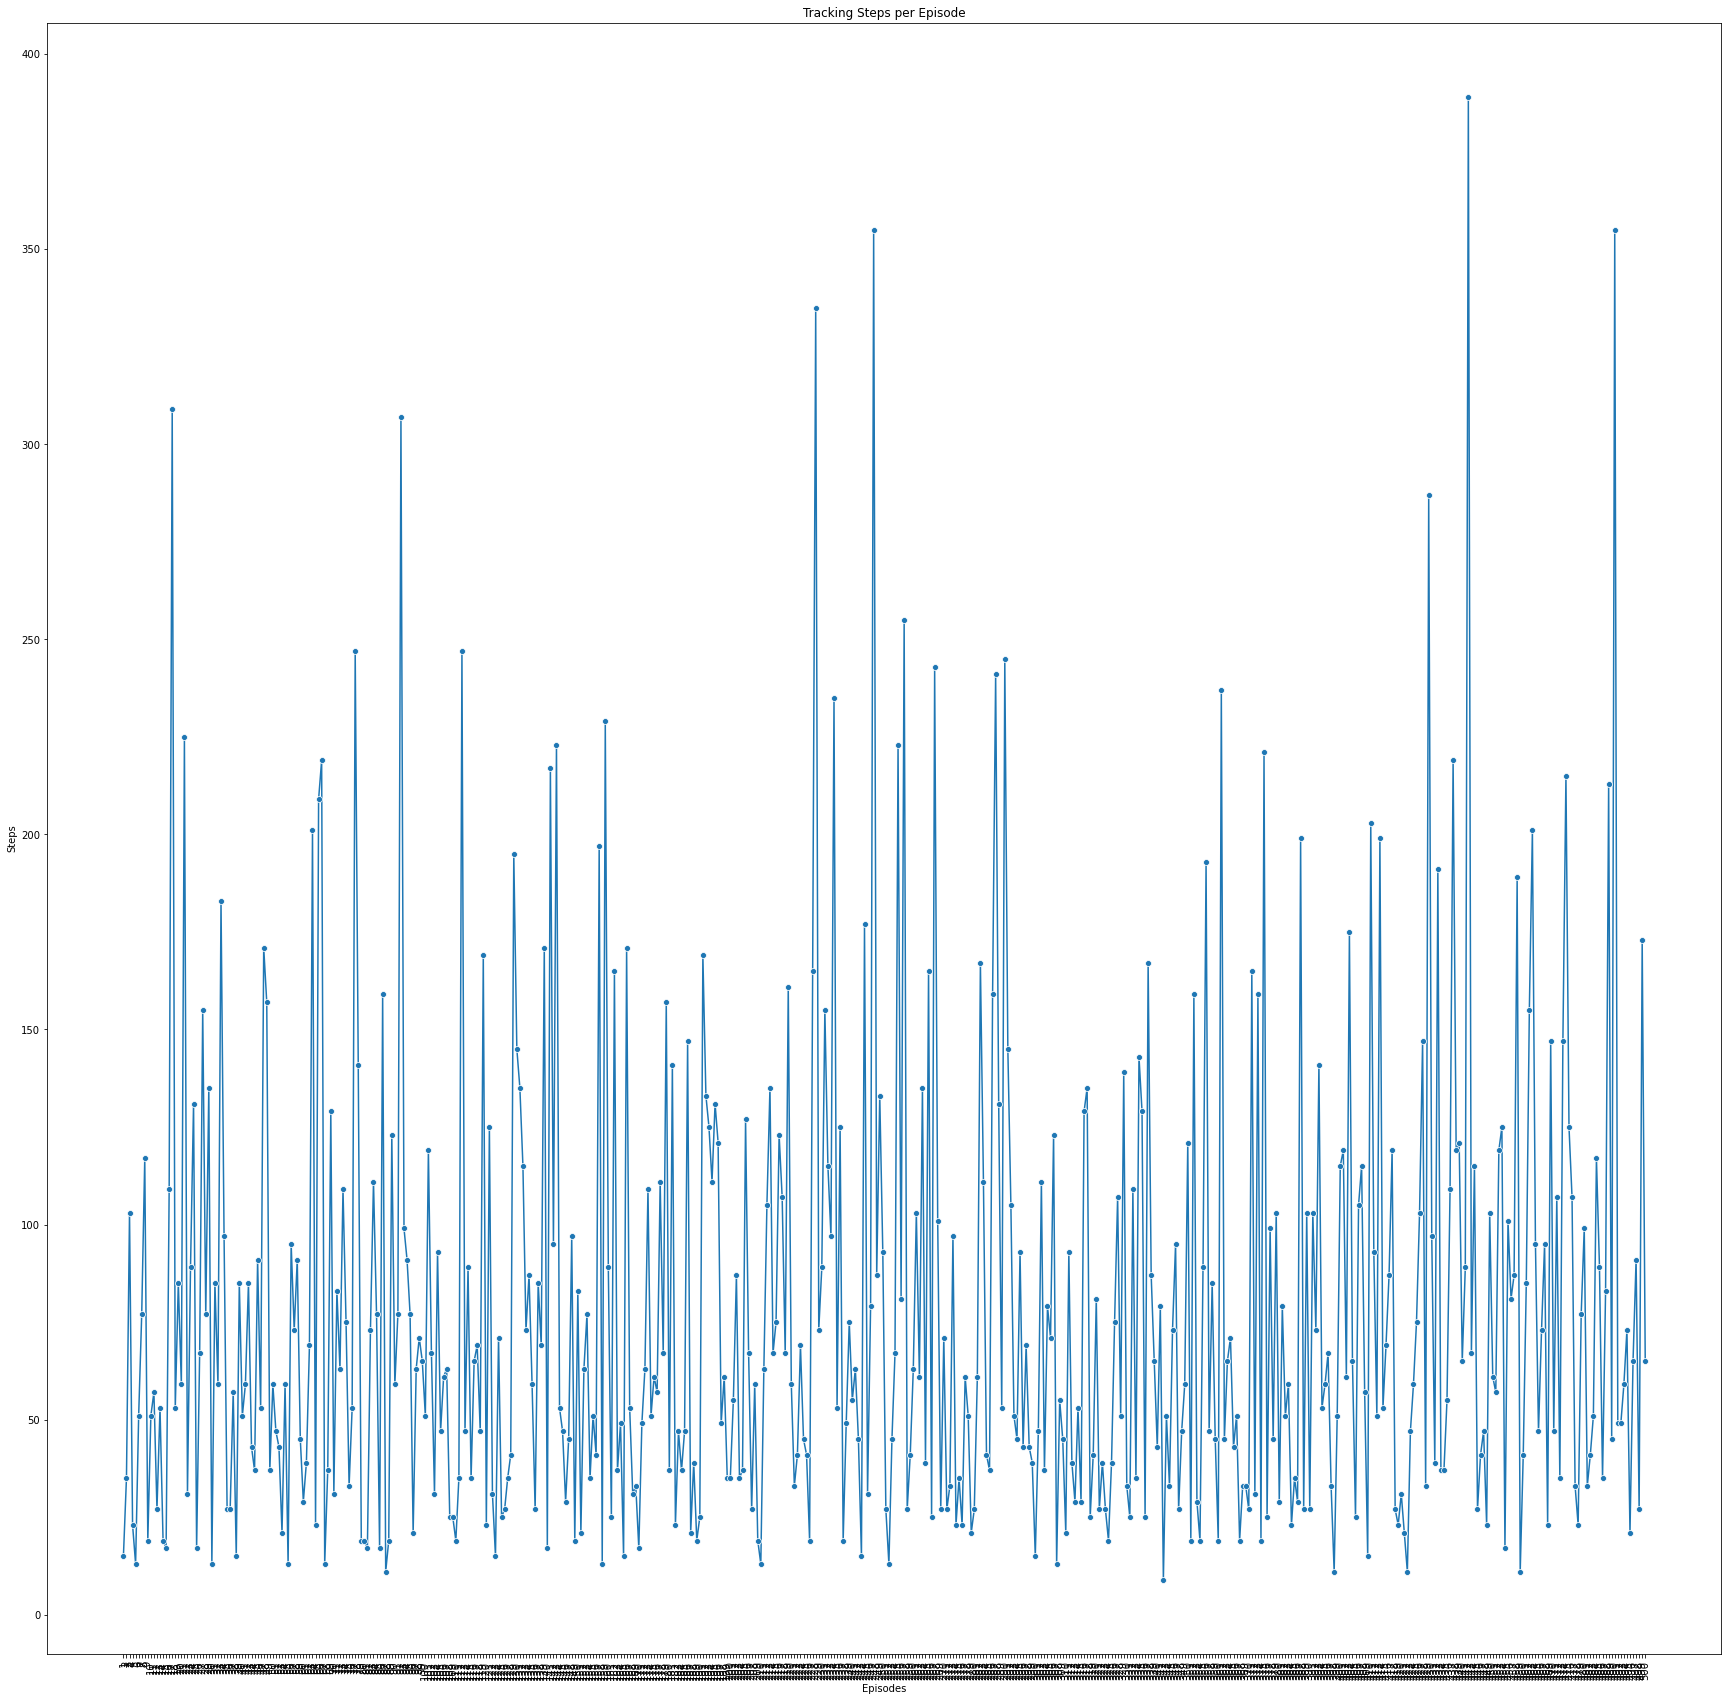

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
data_list = episode_step[:500]
plt.figure(figsize=(30, 30))
ax = sns.lineplot(x=range(1, len(data_list) + 1), y=data_list, marker="o")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.title("Tracking Steps per Episode")
plt.xticks(range(1, len(data_list) + 1), rotation=90)
plt.show()